# Introduction to data visualization with Matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<br>


### Importing a file from GitHub

In [2]:
import requests

url = 'https://raw.githubusercontent.com/vega/vega/main/docs/data/weather.csv'
response = requests.get(url)
open('nazwa_pliku', 'wb').write(response.content)

121417

In [3]:
df = pd.read_csv('nazwa_pliku', parse_dates=['date'])
df

,location,date,precipitation,temp_max,temp_min,wind,weather
0,Seattle,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,Seattle,2012-01-02,10.9,10.6,2.8,4.5,rain
2,Seattle,2012-01-03,0.8,11.7,7.2,2.3,rain
3,Seattle,2012-01-04,20.3,12.2,5.6,4.7,rain
4,Seattle,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...,...
2917,New York,2015-12-27,2.0,17.2,8.9,5.5,rain
2918,New York,2015-12-28,1.3,8.9,1.7,6.3,snow
2919,New York,2015-12-29,16.8,9.4,1.1,5.3,rain
2920,New York,2015-12-30,9.4,10.6,5.0,3.0,rain


In [4]:
df['location'].value_counts()

Seattle     1461
New York    1461
Name: location, dtype: int64

In [5]:
df_ny = df[df['location'] == 'New York']
df_se = df[df['location'] == 'Seattle']

In [7]:
# Date filtering

df_ny_d = df_ny[(df_ny['date'] >='2015-12-01') & (df_ny['date'] <='2015-12-07')]
df_se_d = df_se[(df_se['date'] >='2015-12-01') & (df_se['date'] <='2015-12-07')]

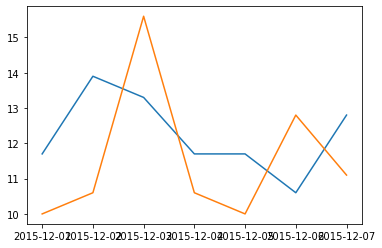

In [8]:
plt.plot(df_ny_d['date'], df_ny_d['temp_max'])
plt.plot(df_se_d['date'], df_se_d['temp_max'])

### Customizing plots

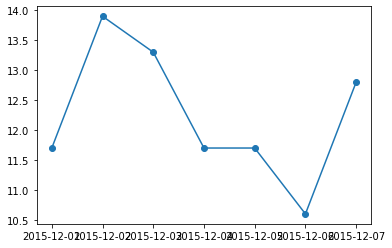

In [9]:
# Adding tags
plt.plot(df_ny_d['date'], df_ny_d['temp_max'], marker='o')
# marker

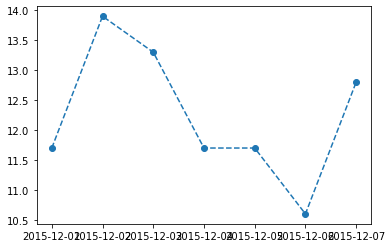

In [10]:
# Line change
plt.plot(df_ny_d['date'], df_ny_d['temp_max'], marker='o', linestyle='--')
# linestyle

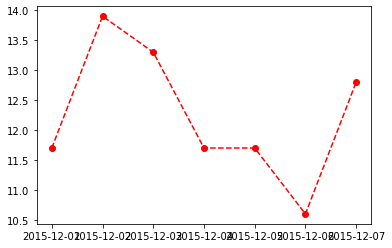

In [12]:
# Personalized color
plt.plot(df_ny_d['date'], df_ny_d['temp_max'], marker='o', linestyle='--', color='r')

Text(0.5, 1.0, 'Temperature in New York')

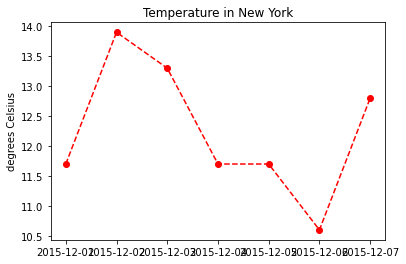

In [13]:
# Adding an axis title
plt.plot(df_ny_d['date'], df_ny_d['temp_max'], marker='o', linestyle='--', color='r')
plt.ylabel('degrees Celsius')
plt.title('Temperature in New York')

### Subplots

Text(0.5, 0, 'Time')

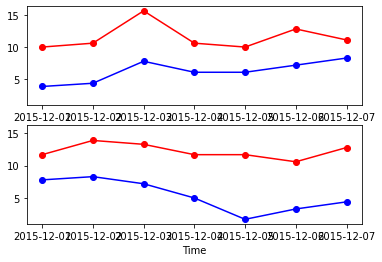

In [14]:
fig, ax = plt.subplots(2,1, sharey=True)       # sharey = True uses the same scale for charts
# Seattle
ax[0].plot(df_se_d['date'], df_se_d['temp_max'], marker = 'o', color='r')
ax[0].plot(df_se_d['date'], df_se_d['temp_min'], marker = 'o', color='b')

# New York
ax[1].plot(df_ny_d['date'], df_ny_d['temp_max'], marker = 'o', color='r')
ax[1].plot(df_ny_d['date'], df_ny_d['temp_min'], marker = 'o', color='b')

ax[1].set_xlabel('Time')

### Time series visualization

In [15]:
climate = pd.read_csv(r"C:\Users\GRZEGORZ\Downloads\climate_change.csv", parse_dates=['date'], index_col='date')
climate

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\GRZEGORZ\\Downloads\\climate_change.csv'

In [ ]:
sixties = climate['1960-01-01':'1969-12-31']
sixties

Text(0, 0.5, 'CO2 (ppm)')

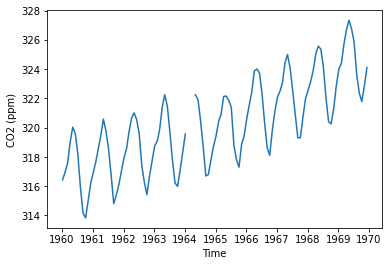

In [18]:
fig, ax = plt.subplots()
ax.plot(sixties.index, sixties['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)')

Text(0, 0.5, 'CO2 (ppm)')

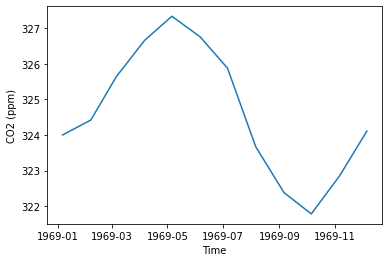

In [19]:
sixty_nine = climate['1969-01-01':'1969-12-31']
fig, ax = plt.subplots()
ax.plot(sixty_nine.index, sixty_nine['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)')

#### Plotting time-series with different variables

Text(0.5, 0, 'Time')

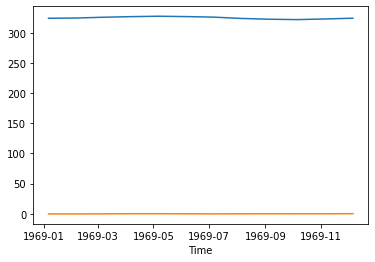

In [20]:
# Zły sposób
fig, ax = plt.subplots()
ax.plot(sixty_nine.index, sixty_nine['co2'])
ax.plot(sixty_nine.index, sixty_nine['relative_temp'] )
ax.set_xlabel('Time')

Text(0, 0.5, 'Relative temperature (Celcius)')

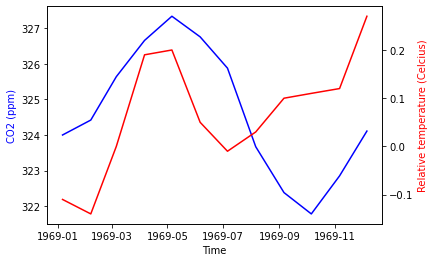

In [21]:
# Poprawny sposób - oś pomocnica
fig, ax = plt.subplots()
ax.plot(sixty_nine.index, sixty_nine['co2'], color='blue')
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)', color='blue')
# Oś pomocnica
ax2 = ax.twinx()
ax2.plot(sixty_nine.index, sixty_nine['relative_temp'], color='r')
ax2.set_ylabel('Relative temperature (Celcius)', color='r')

In [22]:
# Tworzenie funkcji 
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    axes.plot(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color=color)

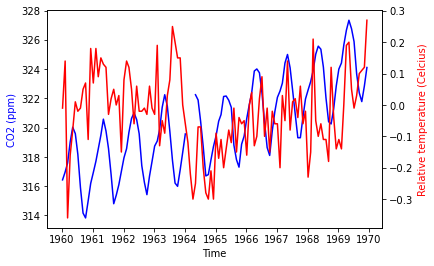

In [23]:
# Tworzenie wykresu przy użyciu zdefiniowanej funkcji
fig, ax = plt.subplots()
plot_timeseries(ax, sixties.index, sixties['co2'], 'blue', 'Time', 'CO2 (ppm)')
ax2 = ax.twinx()
plot_timeseries(ax2, sixties.index, sixties['relative_temp'], 'red', 'Time', 'Relative temperature (Celcius)')

#### Annotating time-series data

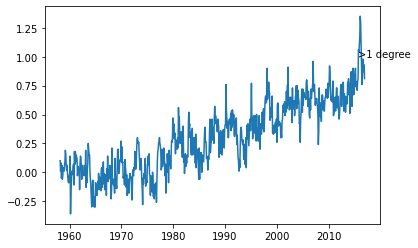

In [24]:
fig, ax = plt.subplots()

# Plot the relative temperature data
ax.plot(climate.index, climate['relative_temp'])

# Annotate the date at which temperatures exceeded 1 degree
ax.annotate('>1 degree', (pd.Timestamp('2015-10-06'), 1))

plt.show()

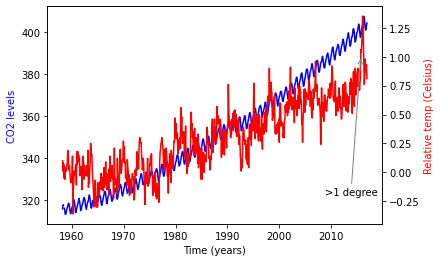

In [25]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate.index, climate["co2"], 'blue', "Time (years)", "CO2 levels")

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate.index, climate['relative_temp'], 'red', "Time (years)", "Relative temp (Celsius)")

# Annotate the point with relative temperature >1 degree
ax2.annotate(">1 degree", xy=(pd.Timestamp('2015-10-06'), 1), xytext=(pd.Timestamp('2008-10-06'), -0.2), arrowprops={'arrowstyle':'->', 'color':'gray'})

plt.show()

#### Quantitative comparisons: bar-charts

In [26]:
medals = pd.read_csv(r"C:\Users\GRZEGORZ\Downloads\medals_by_country_2016.csv", index_col=0)
medals

,Bronze,Gold,Silver
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30
France,21,20,55
Australia,25,23,34
Italy,24,8,38
Canada,61,4,4
Japan,34,17,13


C:\Users\GRZEGORZ\AppData\Local\Temp\ipykernel_11876\1633355277.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation = 90)


Text(0, 0.5, 'Number of medals')

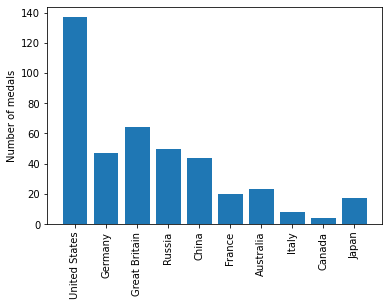

In [27]:
fix, ax = plt.subplots()
ax.bar(medals.index, medals['Gold'])
# Obrót etykiet
ax.set_xticklabels(medals.index, rotation = 90)
ax.set_ylabel('Number of medals')

C:\Users\GRZEGORZ\AppData\Local\Temp\ipykernel_11876\3977621939.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation = 90)


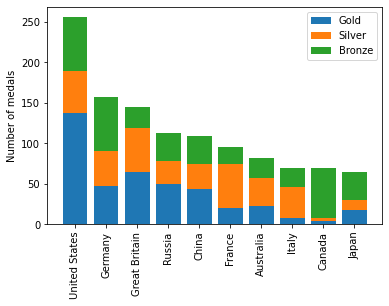

In [28]:
fix, ax = plt.subplots()
ax.bar(medals.index, medals['Gold'], label ='Gold')
ax.bar(medals.index, medals['Silver'], bottom = medals['Gold'], label = 'Silver')
ax.bar(medals.index, medals['Bronze'], bottom = medals['Gold'] + medals['Silver'], label = 'Bronze')
ax.set_xticklabels(medals.index, rotation = 90)
ax.set_ylabel('Number of medals')
# Argument label = 'Gold' pozwala na późniejsze pokaznaie legendy
ax.legend()

#### Histograms

In [29]:
w = pd.read_csv(r"C:\Users\GRZEGORZ\Downloads\summer2016.csv")
w.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
1,161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
2,175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
3,450,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
4,794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver


In [30]:
m_rowing = w[(w['Sport'] == 'Rowing') & (w['Sex'] == 'M')]
m_rowing.head(3)

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
78,11648,6346,Jrmie Azou,M,27.0,178.0,71.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Lightweight Double Sculls,Gold
93,14871,8025,Thomas Gabriel Jrmie Baroukh,M,28.0,183.0,70.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Lightweight Coxless Fours,Bronze


In [31]:
m_gymnastics = w[(w['Sport'] == 'Gymnastics') & (w['Sex'] == 'M')]
m_gymnastics.head(3)

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver
5,796,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horse Vault,Silver
6,797,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Rings,Bronze


Text(0, 0.5, 'Height (cm)')

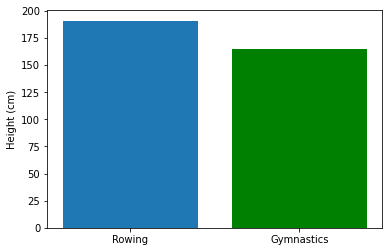

In [32]:
# Porównanie średniego wzrostu medalistów dziedzin
fig, ax = plt.subplots()
ax.bar('Rowing', m_rowing['Height'].mean())
ax.bar('Gymnastics', m_gymnastics['Height'].mean(), color='green')
ax.set_ylabel('Height (cm)')

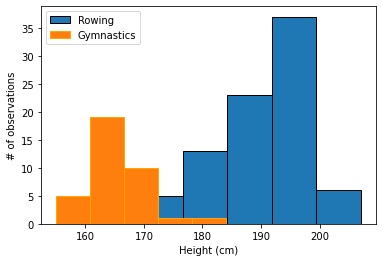

In [33]:
fig, ax = plt.subplots()
ax.hist(m_rowing['Height'], edgecolor = 'black', label = 'Rowing', bins = 5)
ax.hist(m_gymnastics['Height'], edgecolor='orange', label = 'Gymnastics', bins = 5)
ax.set_xlabel('Height (cm)')
ax.set_ylabel('# of observations')
ax.legend()

#### Statistical plotting

Text(0, 0.5, 'Height (cm)')

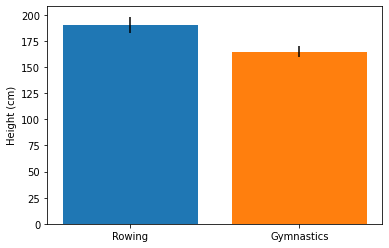

In [34]:
# Słupki błędów
fig, ax = plt.subplots()
ax.bar('Rowing', m_rowing['Height'].mean(), yerr=m_rowing['Height'].std())
ax.bar('Gymnastics', m_gymnastics['Height'].mean(), yerr=m_gymnastics['Height'].std())
ax.set_ylabel('Height (cm)')
# Argument yerr pozwala na utworzenie słupków błędu

#### Box plot

Text(0, 0.5, 'Height (cm)')

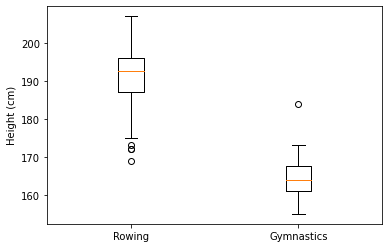

In [35]:
fig, ax = plt.subplots()
# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([m_rowing['Height'], m_gymnastics['Height']])
ax.set_xticklabels(['Rowing', 'Gymnastics'])
ax.set_ylabel('Height (cm)')

# Punkty poza wykresem są wartościami odstającymi

#### Quantitative comparisons: scatter plots

Text(0, 0.5, 'Relative temperature (Celcius)')

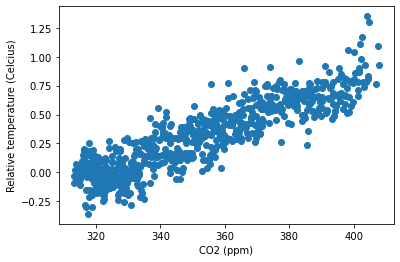

In [36]:
fig, ax = plt.subplots()
ax.scatter(climate['co2'], climate['relative_temp'])
ax.set_xlabel('CO2 (ppm)')
ax.set_ylabel('Relative temperature (Celcius)')

In [37]:
seventies = climate['1970-01-01':'1979-12-31']
seventies.head(3)

,co2,relative_temp
date,,
1970-01-06,325.03,0.09
1970-02-06,325.99,0.22
1970-03-06,326.87,0.08


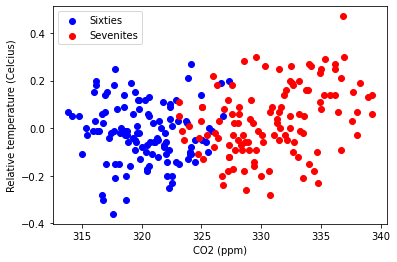

In [38]:
fig, ax = plt.subplots()
ax.scatter(sixties['co2'], sixties['relative_temp'], label = 'Sixties', color='b')
ax.scatter(seventies['co2'], seventies['relative_temp'], label = 'Sevenites', color='r')
ax.set_xlabel('CO2 (ppm)')
ax.set_ylabel('Relative temperature (Celcius)')
ax.legend()

Text(0, 0.5, 'Relative temperature (Celcius)')

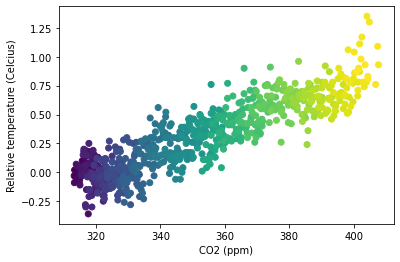

In [39]:
fig, ax = plt.subplots()
# Dodanie argumentu c
ax.scatter(climate['co2'], climate['relative_temp'], c = climate.index)
ax.set_xlabel('CO2 (ppm)')
ax.set_ylabel('Relative temperature (Celcius)')

#### Changing plot style

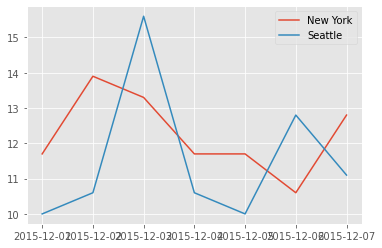

In [50]:
plt.style.use('ggplot')    # 'default'  aby wrócić do klasycznego wyglądu
plt.plot(df_ny_d['date'], df_ny_d['temp_max'], label='New York')
plt.plot(df_se_d['date'], df_se_d['temp_max'], label='Seattle')
plt.legend()

#### Saving visualizations

C:\Users\GRZEGORZ\AppData\Local\Temp\ipykernel_11876\2390963125.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation = 90)


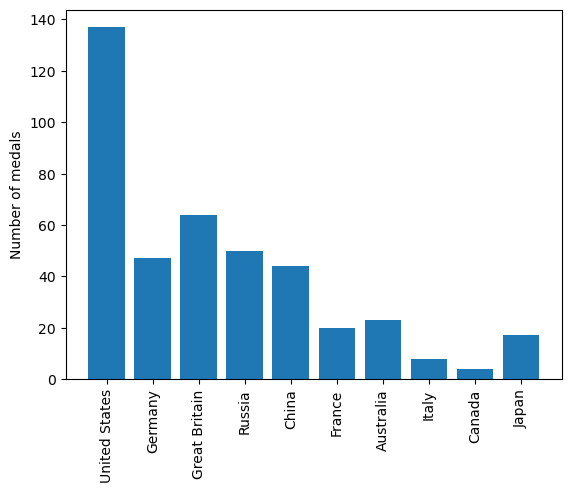

In [63]:
plt.style.use('default')
fix, ax = plt.subplots()
ax.bar(medals.index, medals['Gold'])
ax.set_xticklabels(medals.index, rotation = 90)
ax.set_ylabel('Number of medals')
# Zmiana rozmiaru wykresu
fig.set_size_inches([5,3])

# Zapisywanie wykresu
#fig.savefig('gold_medals.png')

In [57]:
ls

 Volume in drive C is Acer
 Volume Serial Number is D8B9-2402

 Directory of C:\Users\GRZEGORZ\PycharmProjects

26.03.2023  18:59    <DIR>          .
26.03.2023  16:38    <DIR>          ..
22.03.2023  13:30    <DIR>          .ipynb_checkpoints
20.03.2023  14:05           292 007 Data manipulation with pandas.ipynb
26.03.2023  18:58           561 312 Data Visualization with Matplotlib.ipynb
20.03.2023  23:56    <DIR>          DataCamp
08.02.2023  19:52           143 683 Game of Thrones project.ipynb
26.03.2023  18:59            18 910 gold_medals.png
30.06.2022  18:59    <DIR>          Lekcja1
14.03.2023  21:10            59 735 mygraph.png
07.02.2023  19:01    <DIR>          Nauka
26.03.2023  16:44           121 417 nazwa_pliku
12.08.2022  17:19    <DIR>          Pandas
05.03.2023  15:24           192 243 Pandas analysis.ipynb
14.03.2023  22:06         2 750 822 Pandas for DataScience.ipynb
17.03.2023  21:37           164 335 Pandas, Numpy, Matplotlib, Seaborn.ipynb
22.08.2022  10:42  

#### Automating figures from data

In [67]:
sports = w['Sport'].unique()
sports

array(['Rowing', 'Taekwondo', 'Handball', 'Wrestling', 'Gymnastics',
       'Swimming', 'Basketball', 'Boxing', 'Volleyball', 'Athletics',
       'Rugby Sevens', 'Judo', 'Rhythmic Gymnastics', 'Weightlifting',
       'Equestrianism', 'Badminton', 'Water Polo', 'Football', 'Fencing',
       'Shooting', 'Sailing', 'Beach Volleyball', 'Canoeing', 'Hockey',
       'Cycling', 'Tennis', 'Diving', 'Table Tennis', 'Triathlon',
       'Archery', 'Synchronized Swimming', 'Modern Pentathlon',
       'Trampolining', 'Golf'], dtype=object)

C:\Users\GRZEGORZ\AppData\Local\Temp\ipykernel_11876\2466230588.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sports, rotation=90)


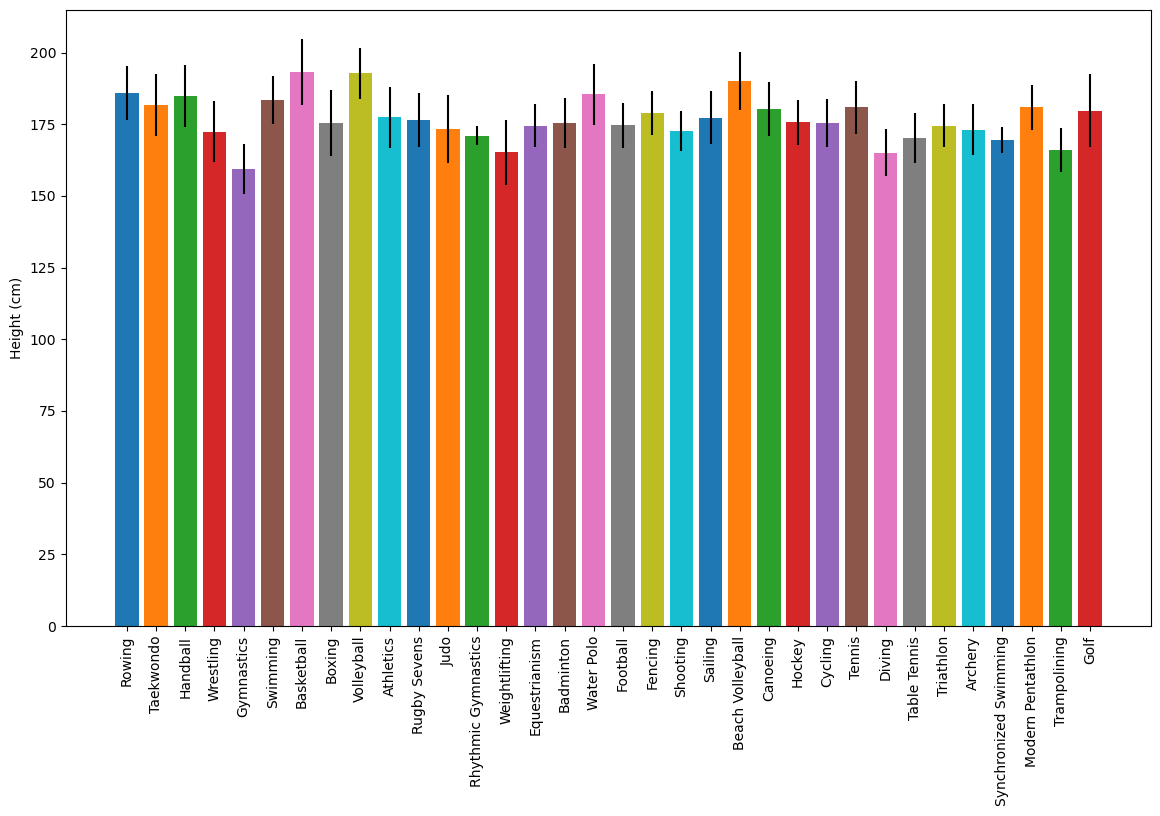

In [72]:
fig, ax = plt.subplots()

for sport in sports:
    sport_df = w[w['Sport'] == sport]
    ax.bar(sport, sport_df['Height'].mean(), yerr=sport_df['Height'].std())
ax.set_ylabel('Height (cm)')
ax.set_xticklabels(sports, rotation=90)
fig.set_size_inches([14,8])

C:\Users\GRZEGORZ\AppData\Local\Temp\ipykernel_11876\4190716190.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sports, rotation=90)


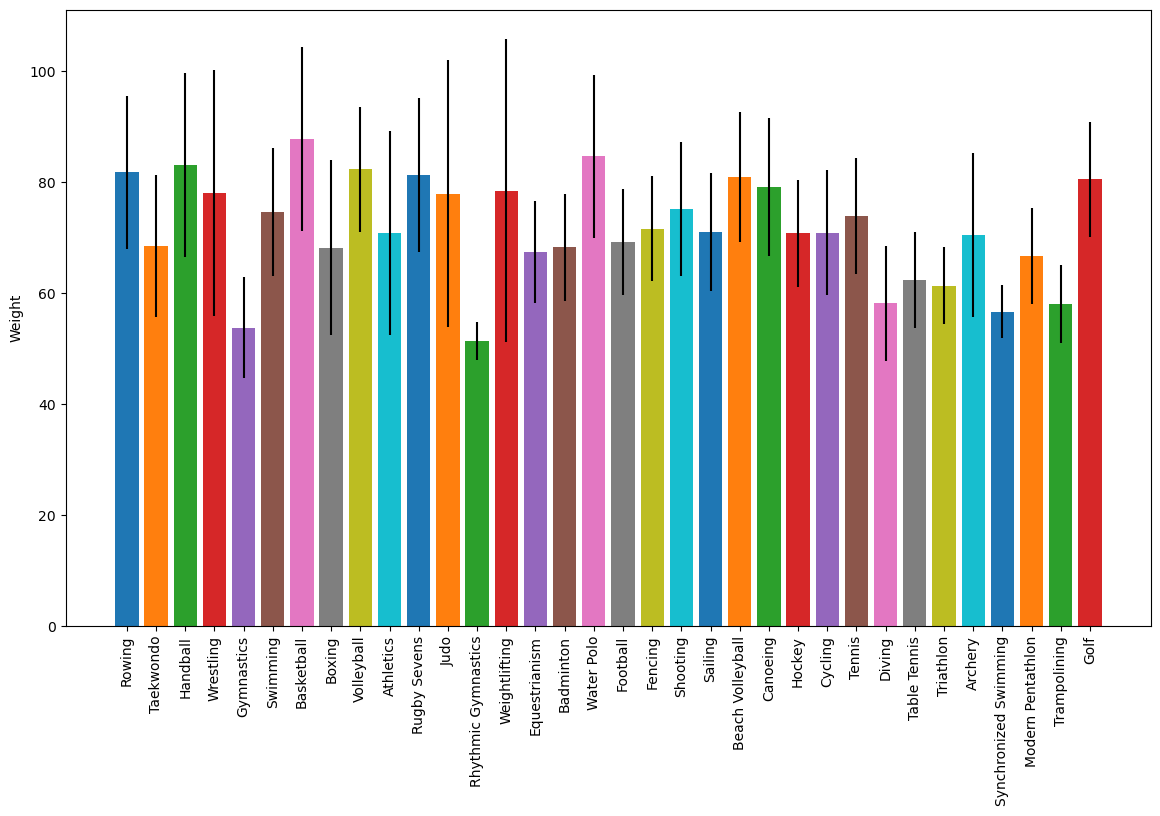

In [74]:
fig, ax = plt.subplots()

# Loop over the different sports branches
for sport in sports:
  # Extract the rows only for this sport
  sport_df = w[w["Sport"] == sport]
  # Add a bar for the "Weight" mean with std y error bar
  ax.bar(sport, sport_df["Weight"].mean(), yerr=sport_df["Weight"].std())

ax.set_ylabel("Weight")
ax.set_xticklabels(sports, rotation=90)
fig.set_size_inches([14,8])